# --------------------------------------- Workshop #4 -------------------------------------


* This workshop includes marked tasks that comprise 15% of your final mark in this module. 

* You need to read the examples in Lecture #4 and Lecture #4 exercise to complete the tasks. 

# Tasks

## TASK 4.1:  Download the adult_WS4 dataset. Apply K-Means and Hierarchical clustering to three optional columns in the dataset. Find the optimum number of clusters for both clustering methods (10%).

## NOTE: You should comment on your code wherever necessary and briefly explain what the code is doing

In [1]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)####################
#IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np

#IMPORT THE DATASET
data4 = pd.read_csv('adult_WS4.csv')

#VIEWING THE FIRST 5 ROWS OF THE DATA
print(data4.head(5))

#CHECKING FOR NULL VALUES
print('NULL VALUES\n')
print(data4.isnull().sum())

#to see the data volume 
print('VALUE DISTRIBUTION ACROSS COLUMNS\n')
data4.count()

   age workclass  fnlwgt     education  education-num      marital-status  \
0   29   Private  216481       Masters             14  Married-civ-spouse   
1   36   Private  280570  Some-college             10  Married-civ-spouse   
2   25         ?  100903     Bachelors             13  Married-civ-spouse   
3   47   Private  145636     Assoc-voc             11  Married-civ-spouse   
4   33   Private  119422       HS-grad              9  Married-civ-spouse   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0    Exec-managerial         Wife  White  Female             0             0   
1       Craft-repair      Husband  White    Male             0             0   
2                  ?         Wife  White  Female             0             0   
3  Handlers-cleaners      Husband  White    Male             0             0   
4    Exec-managerial      Husband  White    Male             0             0   

   hours-per-week native-country income  
0             

age               10000
workclass          9825
fnlwgt            10000
education         10000
education-num     10000
marital-status    10000
occupation         9825
relationship      10000
race              10000
sex               10000
capital-gain      10000
capital-loss      10000
hours-per-week    10000
native-country     9939
income            10000
dtype: int64

#DATA PREPROCESSING

In [2]:
# FIRST WE NEED TO ENCODE THE DATA
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Encode one of the needed column with categorical variables
column = ['race']
data_encode = data4.copy()  # Create a copy to avoid modifying the original DataFrame

# Fit and transform the encoder on the specified columns
data_encode[column] = encoder.fit_transform(data4[column]).astype(int)

In [3]:
#Selecting three columns of choice and output variable
optional_columns = ['race', 'age','hours-per-week']
x = data_encode[optional_columns]
Y=data_encode['income']

In [4]:
#normalising the columns as input data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)

x

array([[ 0.38960857, -0.69969332, -0.03681876],
       [ 0.38960857, -0.1896809 ,  0.36876351],
       [ 0.38960857, -0.99112899, -1.25356557],
       ...,
       [ 0.38960857, -0.6268344 , -0.03681876],
       [ 0.38960857,  0.17461368, -0.03681876],
       [-1.9998951 , -1.28256465, -0.03681876]])

C:\Users\dessy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dessy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dessy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dessy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

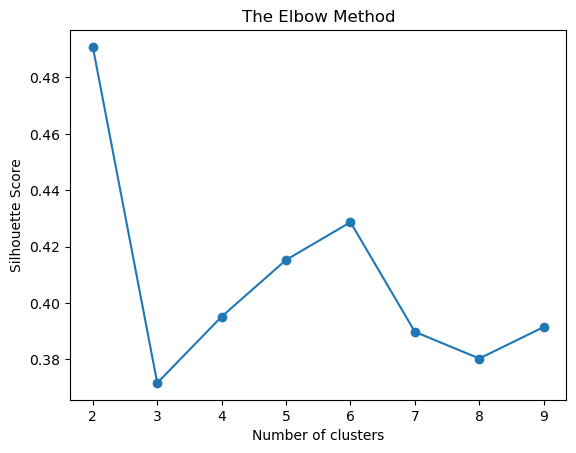

In [5]:
#Apply K-Means clustering with varying numbers of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
k_range = range(2, 10)
kmeans_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    kmeans_scores.append(silhouette_score(x, kmeans.labels_))

# Plot the silhouette scores for different numbers of clusters
plt.plot(k_range, kmeans_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('The Elbow Method')
plt.show()



#HIERARCHICAL METHOD OF CLUSTERING 

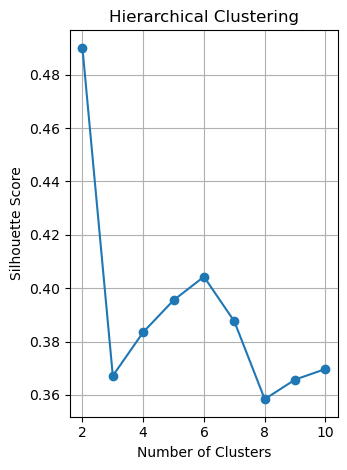

In [10]:
# Hierarchical clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
agg_scores = []
for k in range(2, 11):
    agg=AgglomerativeClustering(n_clusters=k)
    agg.fit(x)
    agg_scores.append(silhouette_score(x, agg.labels_))
    
# Plot Silhouette Scores for Hierarchical Clustering
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), agg_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Hierarchical Clustering')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()    

## Task 4.2: Apply the PCA method to the dataset and extract the first two principal components (n_components=2). Plot the scatter plot of the dataset's first two components for the two classes of the income column (5%). 

## NOTE 1: You should comment on your code wherever necessary and briefly explain what the code is doing.

## NOTE 2: You need to encode the categorical columns, normalise the dataset, and remove the income column before applying the PCA method. 

## HINT: See the examples in the last three slides in Lecture #4 or the Lecture #4 exercise notebook

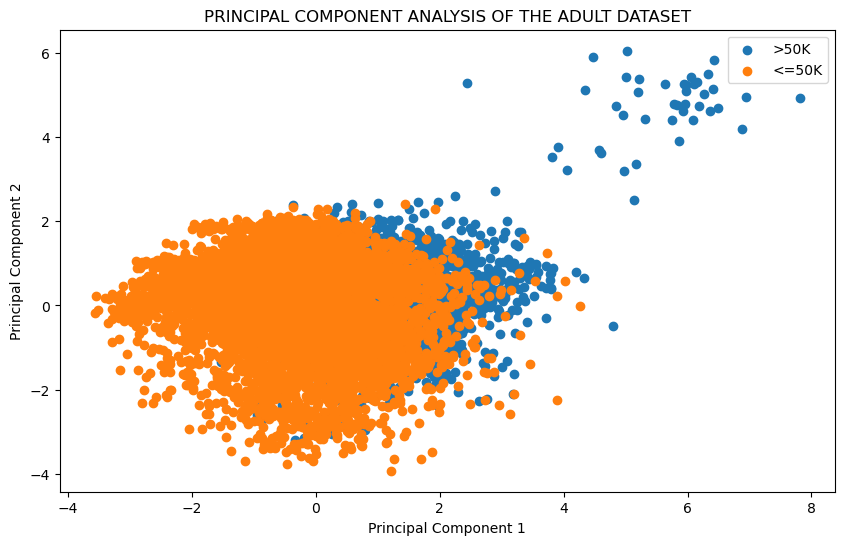

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# IMPORT THE ADULT DATASET
data4 = pd.read_csv('adult_WS4.csv')

# PREPROCESSING
#THE DATASET BY DROPPING NULL VALUES
data4.dropna(inplace=True)

# ENCODING THE CATEGORICAL COLUMNS
df = pd.get_dummies(data4, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

# NORMALIZING THE NUMERICAL COLUMNS 
SS = StandardScaler()
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numerical_columns] = SS.fit_transform(df[numerical_columns])

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.drop(columns=['income']))

#Plot Scatter Plot
plt.figure(figsize=(10, 6))
for label in df['income'].unique():
    plt.scatter(principal_components[df['income']==label, 0], principal_components[df['income']==label, 1], label=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PRINCIPAL COMPONENT ANALYSIS OF THE ADULT DATASET')
plt.legend()
plt.show()



#TOTAL WORDS 271